# Exploring Spotify Dataset # 2 

This notebook is an analysis of the SECOND spotify dataset scraped from Spotify's API and posted on Kaggle. 

This dataset of Spotify tracks has over 125 different genres. Each track has some audio features associated with it. The data is in CSV format which is tabular and can be loaded quickly.

**Concerns/Things to Check for:**
- unique genres
- distribution of genres (whether similar to spotify dataset #1)


**Column Info:**
- track_id: The Spotify ID for the track
- artists: The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- album_name: The album name in which the track appears
- track_name: Name of the track
- popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- duration_ms: The track length in milliseconds
- explicit: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- loudness: The overall loudness of a track in decibels (dB)
- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- track_genre: The genre in which the track belongs


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

# Preliminary EDA 

In [2]:
# Reading in the csv 
spotify_2 = pd.read_csv("~/Downloads/Spotify2.csv")

In [3]:
# Finding the shape of the dataset 
spotify_2.shape

(114000, 21)

There are 114,000 rows and 21 columns. 

In [4]:
# Looking at the top of the data 
spotify_2.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
# Looking at the bottom of the data 
spotify_2.tail() 

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


In [6]:
spotify_2.sample(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
33995,33995,2h0O3uXZW6ClktlgHWGpjy,"Slaughter Beach, Dog",Birdie,Acolyte,63,316468,False,0.790,0.476,...,-10.674,1,0.0338,0.7820,0.0942,0.1130,0.774,123.977,4,emo
40387,40387,14ee4tr2EALjOBRLutlCl7,Juliano Son,Mais um Dia (ao Vivo),Quando o Mundo Cai Ao Meu Redor - Ao Vivo,43,297540,False,0.216,0.823,...,-5.530,1,0.0541,0.0642,0.0000,0.5940,0.298,164.412,4,gospel
89553,89553,1DoK3CdipMjplLk5LXUdcp,J Balvin;Willy William;Beyoncé,Mi Gente (feat. Beyoncé),Mi Gente (feat. Beyoncé),63,209733,False,0.759,0.716,...,-6.360,0,0.0818,0.0223,0.0000,0.2310,0.469,105.021,4,reggaeton
41319,41319,3r1wBi6ItwkfEFTmNLJKMC,Lani Mo;Näääk;Nimo,T(r)aktkänsla,Den där gärin,27,182520,False,0.668,0.514,...,-6.936,0,0.3590,0.2810,0.0000,0.1300,0.674,126.913,5,goth
23814,23814,2SmDsqV1mfn1dQ658EHpa3,Rampa,Secret Weapons (Part 8),Necessity,44,469808,False,0.724,0.492,...,-11.917,1,0.0405,0.2010,0.6780,0.0976,0.126,120.003,4,deep-house


In [7]:
# With so many columns, it's hard to see them all in the head or tail. 
# Column names: 
spotify_2.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [8]:
spotify_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

We have a mix of data types. Looks like we have some categorical variables like `mode` and `time_signature` that have the data types int64 and another, `explicit`, that has a bool data type. 

There is only one missing value - seems like it could be one track that is missing values in a few different columns. We can check on that later when exploring missing values and duplicates. 

Since our main interest is in the genre, let's see how many unique genres there are: 

In [9]:
genres = spotify_2["track_genre"].unique()

In [10]:
print(genres)

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

In [11]:
len(genres)

114

There are 114 genres in this dataset. 

In [12]:
spotify_2["track_genre"].value_counts()

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64

In [13]:
# max number of songs in genre 
max_genre = spotify_2["track_genre"].value_counts().max()
min_genre = spotify_2["track_genre"].value_counts().min()

In [14]:
print(max_genre)

1000


In [15]:
print(min_genre)

1000


It looks as though the genres are evenly distributed and there are 1000 songs in each genre. 

The only genre in the 1st spotify dataset that isn't present in this one is `absolute music`. It's possible to still combine the two. If there are enough in that genre from the other dataset we can keep it in the dataset. 

Let's check the distribution amongst the genres. 

Now that we know that the songs are evenly distributed amongst the 114 genres, let's find the row with the three missing values. 

## Missing Values and Duplicates

In [16]:
# checking row with missing value in the artist column 
spotify_2[spotify_2["artists"].isna()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,...,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


My earlier assumption was right. This is the one row with missing values in 3 columns: artists, album_name, and track_name. Unfortunately, the track id did not lead us to the song on spotify's website. Let's go ahead and delete this row.

In [17]:
# Removing column with missing values that couldn't be found.
spotify_2.drop(spotify_2.index[65900], inplace=True)

In [18]:
# Sanity check 
spotify_2[spotify_2["artists"].isna()]

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


Let's keep looking for other duplicates. 

In [19]:
# checking for duplicates 
duplicates = spotify_2[spotify_2.duplicated()]

In [20]:
print(duplicates)

Empty DataFrame
Columns: [Unnamed: 0, track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []

[0 rows x 21 columns]


In [21]:
spotify_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

According to the above outputs, there are no duplicates. However, after reading about the Popularity column in the data dictionary, I realized that there are possible duplicates that won't show up as duplicates because they have unique track id's. The same song could be on multiple albums released by an artist. Let's check out how many of those duplicates we have. 

In [22]:
# Checking for duplicate rows while ignoring the track id column
cols = list(spotify_2.columns)
cols.remove("track_id")
print(cols)

['Unnamed: 0', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']


In [23]:
# Duplicate rows 
song_duplicates = spotify_2[spotify_2.duplicated(subset=cols)]
song_duplicates

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


There are 577 duplicate rows. Let's remove these rows and save the resulting dataframe to a new variable so we can come back to these if necessary. 

In [24]:
spotify_cleaned = spotify_2.drop_duplicates(song_duplicates)

In [25]:
spotify_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

In [26]:
 cleaned_duplicates = spotify_cleaned[spotify_cleaned.duplicated(subset=cols)]

In [27]:
spotify_cleaned.drop_duplicates(cleaned_duplicates, inplace=True)

In [28]:
spotify_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          113999 

In [29]:
# Looking at the head one more time
spotify_cleaned.head(4)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.132,0.143,181.740,3,acoustic


In [46]:
# Removing the 1st column
spotify_cleaned.drop(columns="Unnamed: 0", inplace=True)

In [47]:
# Sanity check 
spotify_cleaned.head(4)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.132,0.143,181.740,3,acoustic


We now have a clean dataset. Let's check out the distribution of the numeric columns and the correlation between variables 

## Distributions and Correlations 

In [32]:
# summary stats about spotify_cleaned.describe()

In [49]:
# Dataframe of numeric columns 
spotify_num = spotify_cleaned.select_dtypes("number")

In [50]:
#Numeric column names 
num_columns = list(spotify_cleaned.select_dtypes("number"))

In [51]:
num_columns

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [52]:
spotify_num

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


In [53]:
# number of columns to plot 
len(spotify_num.columns)

14

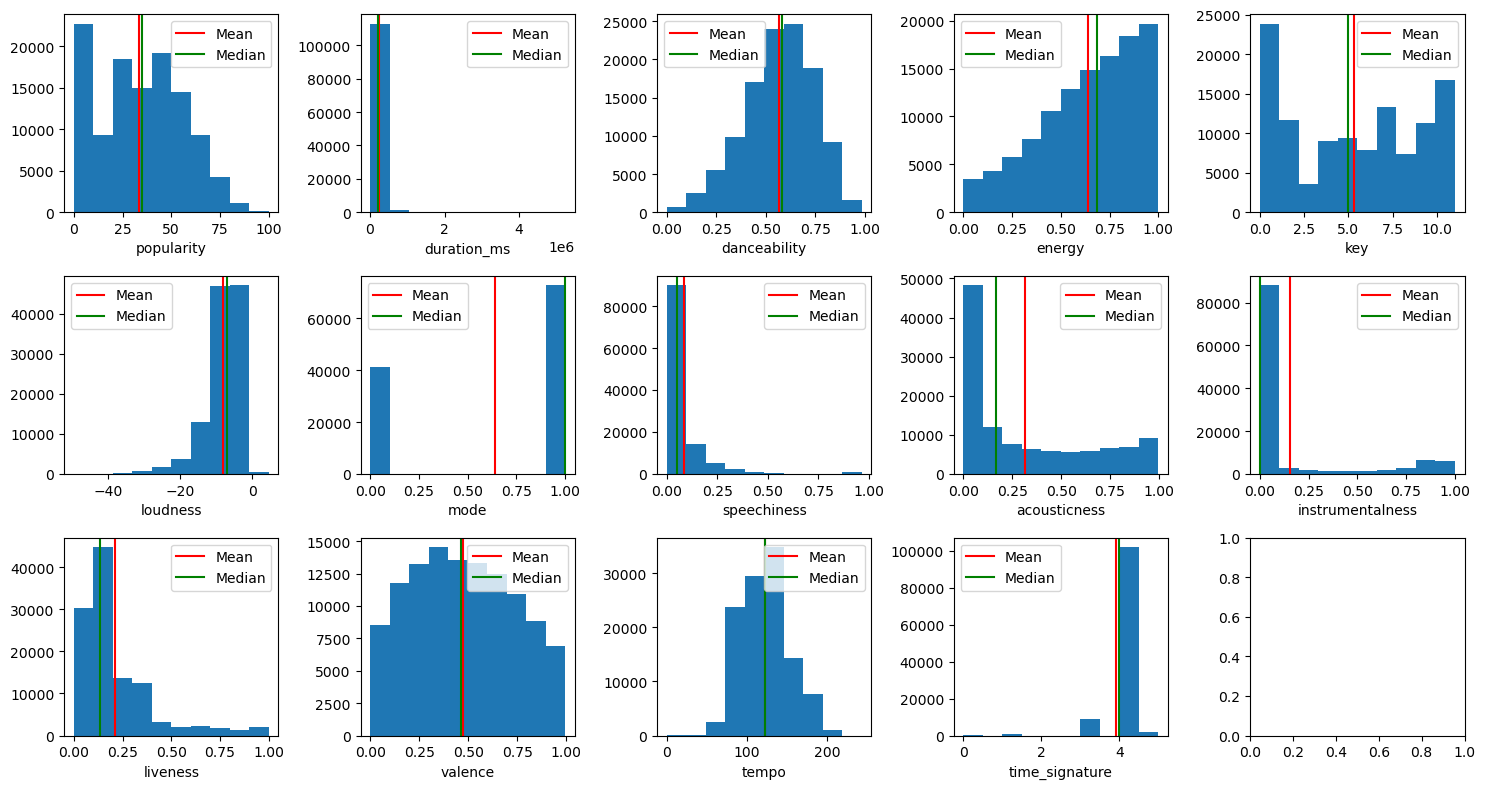

In [54]:
# grid of plots
plt.subplots(3,5, figsize=(15,8))

plot_num = 1 

# Looping through numeric columns
for col in num_columns:
        
    var = spotify_cleaned[col]
    var_mean = var.mean()
    var_median = var.median()
    
    plt.subplot(3,5,plot_num)
    plt.hist(var)
    plt.axvline(var_mean, c='r', label='Mean')
    plt.axvline(var_median, c='g', label='Median')
    plt.legend()
    plt.xlabel(col)
    
        
    plot_num +=1
    
plt.tight_layout()

plt.show()


Danceability, valence and tempo have fairly normal distributions. 

Energy, loudness, and time signature are skewed to the left. 

Speechiness, acousticness, instrumentalness, liveness are skewed right. 

In [60]:
spotify_num.corr()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.007129,0.035444,0.001053,-0.003847,0.050420,-0.013948,-0.044930,-0.025458,-0.095147,-0.005397,-0.040522,0.013212,0.031076
duration_ms,-0.007129,1.000000,-0.073435,0.058520,0.008123,-0.003475,-0.035581,-0.062605,-0.103770,0.124364,0.010308,-0.154464,0.024356,0.018229
danceability,0.035444,-0.073435,1.000000,0.134325,0.036470,0.259076,-0.069224,0.108625,-0.171531,-0.185608,-0.131620,0.477347,-0.050448,0.207219
energy,0.001053,0.058520,0.134325,1.000000,0.048007,0.761690,-0.078365,0.142508,-0.733908,-0.181880,0.184795,0.258937,0.247852,0.187127
key,-0.003847,0.008123,0.036470,0.048007,1.000000,0.038591,-0.135911,0.020419,-0.040942,-0.006821,-0.001597,0.034099,0.010914,0.015064
loudness,0.050420,-0.003475,0.259076,0.761690,0.038591,1.000000,-0.041768,0.060826,-0.589804,-0.433478,0.076897,0.279851,0.212447,0.191992
mode,-0.013948,-0.035581,-0.069224,-0.078365,-0.135911,-0.041768,1.000000,-0.046535,0.095568,-0.049961,0.014004,0.021964,0.000572,-0.024090
speechiness,-0.044930,-0.062605,0.108625,0.142508,0.020419,0.060826,-0.046535,1.000000,-0.002184,-0.089617,0.205218,0.036637,0.017274,-0.000011
acousticness,-0.025458,-0.103770,-0.171531,-0.733908,-0.040942,-0.589804,0.095568,-0.002184,1.000000,0.104033,-0.020693,-0.107081,-0.208231,-0.176142
instrumentalness,-0.095147,0.124364,-0.185608,-0.181880,-0.006821,-0.433478,-0.049961,-0.089617,0.104033,1.000000,-0.079896,-0.324310,-0.050328,-0.082580


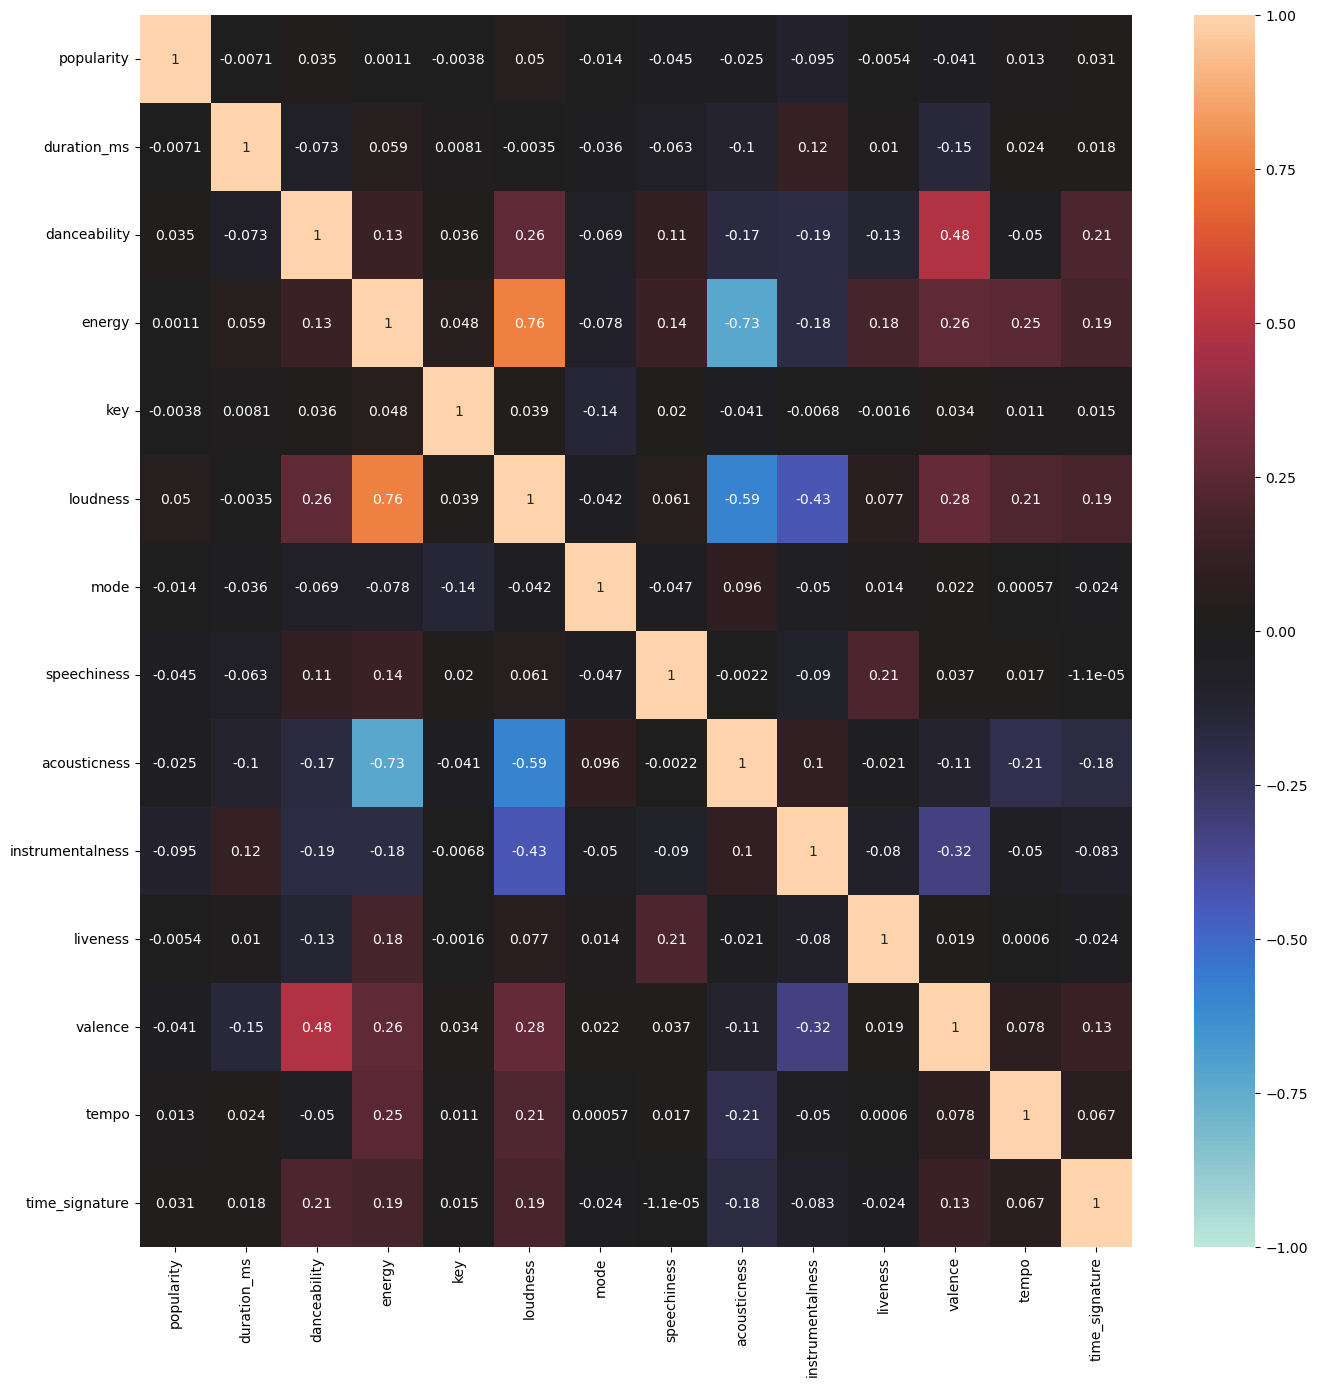

In [61]:
plt.figure(figsize=(16,16)) 
sns.heatmap(spotify_num.corr(), annot=True, center = 0, vmin=-1, vmax=1)
plt.show()

There's a weaker positive correlation between valence and danceability. There's a strong positive correlation between energy and loudness. 
There is a negative correlation between loudness and acousticness and a strong negative correlation between energy and acoustiness. 
These correlations confirm one another. 

There aren't many correlations between the variables. It will be interesting to see if there are any patterns in these independent variables that predict genre. Let's first do a little exploring between these indepedent variables and one genre that has known distinctive characteristics and another genre that might have more broad characteristcs. Then, let's look at a the IV, valence. 

## Key Signature (`key` and `mode`)

In [67]:
key_sig = spotify_cleaned[["key", "mode"]].value_counts().sort_values()
key_sig

key  mode
3    0        1344
8    0        1918
3    1        2226
2    0        2582
0    0        2864
7    0        3095
1    0        3595
10   1        3719
     0        3737
6    0        3825
5    0        4024
6    1        4096
11   1        4134
4    1        4275
9    0        4453
4    0        4733
11   0        5148
5    1        5344
8    1        5442
9    1        6860
1    1        7177
2    1        9062
7    1       10149
0    1       10197
Name: count, dtype: int64

In [72]:
spotify_cleaned["mode"].value_counts(normalize=True)

mode
1    0.637558
0    0.362442
Name: proportion, dtype: float64

Based on the information in the data dictionary, mode refers to whether a key signature is major or minor where 1=major and 0=minor. In order to find the most common key signatures, we have to look at a value counts of the unique combinations of mode and key. 

The top 3 key signatures are C major, G Major and D major - very popular keys in popular music. It's difficult to speak to six of the minor key/mode combinations. because of enharmonic spelling, it could be one of two minor keys. We can only guess and use the more common minor keys. 

~64% of the songs are in a major key. In the correlation plot, we didn't see any relationship between key and valence, but let's see if we notice any pattern. 

In [76]:
combo = spotify_cleaned[["valence", "key", "mode"]].value_counts().sort_values()
# Thee are 24,623 unique combinations of valence, key and, mode. Let's look at the top 10. 
combo

valence  key  mode
0.9950   11   0         1
0.8840   8    0         1
0.0448   2    1         1
         4    1         1
         9    1         1
                     ... 
0.8360   8    1        69
0.5500   3    0        76
0.9710   11   1        77
0.3260   0    1        77
0.9490   10   1       147
Name: count, Length: 24623, dtype: int64

In [78]:
combo.tail(10)

valence  key  mode
0.922    3    0        60
0.639    1    1        65
0.304    3    0        66
0.573    7    1        66
0.717    7    1        68
0.836    8    1        69
0.550    3    0        76
0.971    11   1        77
0.326    0    1        77
0.949    10   1       147
Name: count, dtype: int64

In [88]:
valence_key = spotify_cleaned.groupby("valence")[["key", "mode"]].count().sort_values(by="valence")
valence_key

,key,mode
valence,,
0.000000,176,176
0.000010,129,129
0.000322,1,1
0.000378,1,1
0.000667,1,1
...,...,...
0.991000,3,3
0.992000,4,4
0.993000,3,3


In [92]:
spotify_cleaned.groupby("valence")("key").max()

TypeError: 'DataFrameGroupBy' object is not callable

## Valence 

In [94]:
spotify_cleaned["valence"].nunique()

1790

There are 1,790 unique valence values ranging from zero to one. 

In [105]:
spotify_cleaned.loc[(spotify_cleaned["valence"] >= 0.99)]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1813,1QGpYmCjN9Jp4MGXXKnlRt,Victor Rice,Drink,The Demander,18,138817,False,0.678,0.785,11,-8.721,0,0.0440,0.00941,0.811000,0.1700,0.995,141.557,4,afrobeat
21337,7tdiJEsCdhdJ0jXGhMQbaG,Apache Indian,Time For Change,Tell Me Now,0,254026,False,0.718,0.897,4,-4.401,1,0.0371,0.04330,0.000028,0.0783,0.991,137.009,4,dancehall
24889,1giYZTqlSKHv7CTIyw0A6E,Terrence Parker,GOD Loves Detroit,GOD Will Provide,5,412680,False,0.808,0.779,1,-7.100,0,0.0546,0.00205,0.936000,0.0467,0.991,122.005,4,detroit-techno
25269,5xQr5TxQ77siaKfuyiJbT0,Ottawan,Hands Up,Hands Up - Single Version,66,208573,False,0.888,0.876,8,-4.249,1,0.0425,0.61000,0.000032,0.3750,0.992,123.291,4,disco
32429,5xQr5TxQ77siaKfuyiJbT0,Ottawan,Hands Up,Hands Up - Single Version,66,208573,False,0.888,0.876,8,-4.249,1,0.0425,0.61000,0.000032,0.3750,0.992,123.291,4,electronic
36181,5xQr5TxQ77siaKfuyiJbT0,Ottawan,Hands Up,Hands Up - Single Version,66,208573,False,0.888,0.876,8,-4.249,1,0.0425,0.61000,0.000032,0.3750,0.992,123.291,4,french
46041,4eAGVhU2RE0OYfFPXmhixc,Lawineboys,Remmen Los,Zuipen,30,160000,False,0.849,0.867,0,-5.832,1,0.0350,0.15800,0.000000,0.2990,0.993,121.970,4,happy
48741,4eAGVhU2RE0OYfFPXmhixc,Lawineboys,Remmen Los,Zuipen,30,160000,False,0.849,0.867,0,-5.832,1,0.0350,0.15800,0.000000,0.2990,0.993,121.970,4,hardcore
66064,6D2DCGCJIwF01yYQ9uirb6,Debbie Doo,Roll Your Hands,Roll Your Hands,32,72718,False,0.741,0.700,0,-7.358,1,0.0391,0.16700,0.000000,0.1790,0.993,155.892,4,kids
66709,3W6NZot33kWXV7Kxty8Ecr,Debbie Doo,Round and Round We Go,Round and Round We Go,27,74266,False,0.769,0.541,7,-11.151,1,0.0351,0.02530,0.000043,0.0305,0.991,115.968,4,kids


In [99]:
spotify_cleaned["valence"].value_counts()

valence
0.961000    300
0.304000    248
0.717000    233
0.962000    230
0.324000    225
           ... 
0.019900      1
0.000378      1
0.000667      1
0.006930      1
0.003120      1
Name: count, Length: 1790, dtype: int64

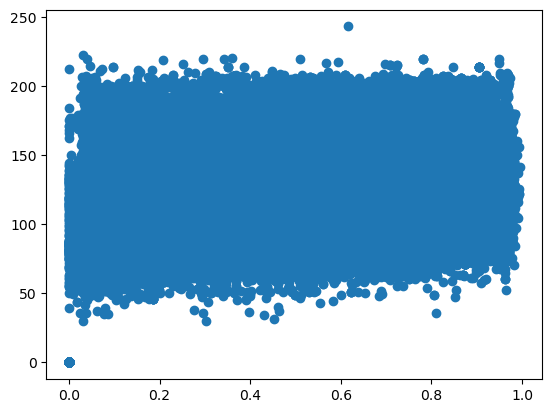

In [106]:
plt.figure()
plt.scatter(x=spotify_cleaned["valence"], y=spotify_cleaned["tempo"])
plt.show()

In [108]:
spotify_cleaned.to_csv("spotify_cleaned.csv")